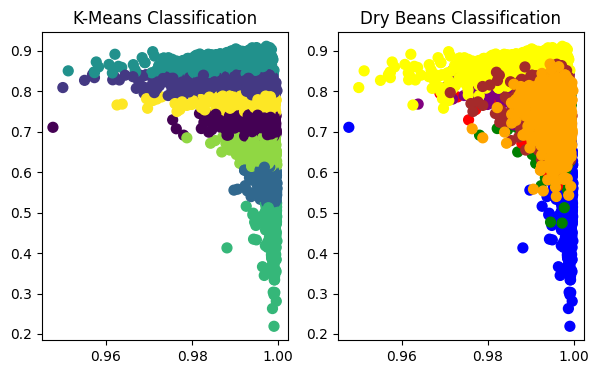

In [13]:
#This program uses K means clustering algorithm which is an unsupervised algorithm
#An unsupervised algorithm doesn't rely on training data to create results it's able to do that itself
#Kmeans works by finding k amount of centroids onto a graph with all of the datapoints
#it then assigns all datapoints to the cloest centroid centroids and calculates the mean position of every datapoint
#after finding the mean the centroids moves to that position and the entire process repeats until the centroids stop moving
#this only works on group type data

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as am
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

import random

# graph setup
# display matplotlib plots inline in Jupyter notebooks
%matplotlib inline  
rcParams['figure.figsize'] = 7, 4  # set the default figure size for plots

random_integer = random.randint(0, 100)  # generate a random integer between 0 and 100

# read data from a CSV file named 'dry_beans_dataset.csv' into a pandas
data = pd.read_csv('data/dry_beans_dataset.csv', sep=",")

# extract the columns "Area" and "roundness" from the DataFrame as features
X = data[["ShapeFactor4", "Eccentricity"]]  # use DataFrame columns directly

# Initialize the KMeans clustering algorithm with 7 clusters and a random seed
clustering = KMeans(n_clusters=7, random_state=random_integer, n_init=10)
clustering.fit(X)  # fit the clustering model to the data

predicted_labels = clustering.labels_  # get the predicted cluster labels for each data point

colour_list = ["blue", "green", "red", "purple", "orange", "yellow", "brown"]  # List of colors for clusters
beans = ["SEKER", "BARBUNYA", "BOMBAY", "CALI", "DERMASON", "HOROZ", "SIRA"]  # List of bean types

# Predict cluster labels for each data point in X
colour = clustering.predict(X)

# Create a subplot with two plots side by side
plt.subplot(1, 2, 1)
# Scatter plot of data points with x-axis as "Area", y-axis as "roundness", and color-coded by predicted cluster
plt.scatter(x=data["ShapeFactor4"], y=data["Eccentricity"], c=colour, s=50)
plt.title("K-Means Classification")  # Set the title for the subplot

plt.subplot(1, 2, 2)
# Scatter plot of data points with x-axis as "Area", y-axis as "roundness", and color-coded by bean type
plt.scatter(x=data["ShapeFactor4"], y=data["Eccentricity"], c=[colour_list[beans.index(c)] for c in data.Class], s=50)
plt.title("Dry Beans Classification")  # Set the title for the subplot

plt.show()  # Display the entire plot with both subplots
